In [76]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.pyplot as plt

plt.style.use("ggplot")

import warnings
warnings.filterwarnings("ignore")

In [77]:
df = pd.read_csv('C:/Users/Ranesh/OneDrive/Desktop/Machine Leraning Projects/automotive_engine_health_prediction-main/automotive_engine_health_prediction-main/engine_data.csv')
df.head(10)

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0
5,1221,3.989226,6.679231,2.214250,76.401152,75.669818,0
6,716,3.568896,5.312266,2.461067,83.646589,79.792411,1
7,729,3.845166,10.191126,2.362998,77.921202,71.671761,1
8,845,4.877239,3.638269,3.525604,76.301626,70.496024,0
9,824,3.741228,7.626214,1.301032,77.066520,85.143297,0


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
 6   Engine Condition  19535 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB


In [79]:
df.describe()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
count,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000
mean,791.239263,3.303775,6.655615,2.335369,77.643420,78.427433,0.630509
std,267.611193,1.021643,2.761021,1.036382,3.110984,6.206749,0.482679
min,61.000000,0.003384,0.003187,0.002483,71.321974,61.673325,0.000000
25%,593.000000,2.518815,4.916886,1.600466,75.725990,73.895421,0.000000
50%,746.000000,3.162035,6.201720,2.166883,76.817350,78.346662,1.000000
75%,934.000000,4.055272,7.744973,2.848840,78.071691,82.915411,1.000000
max,2239.000000,7.265566,21.138326,7.478505,89.580796,195.527912,1.000000


In [80]:
df.columns

Index(['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure',
       'lub oil temp', 'Coolant temp', 'Engine Condition'],
      dtype='object')

In [90]:
df.rename(columns = {'Engine rpm':'Engine_rpm','Lub oil pressure':'Lub_oil_pressure','Fuel pressure':'Fuel_pressure','Coolant pressure':'Coolant_pressure','lub oil temp':'lub_oil_temp','Coolant temp':'Coolant_temp','Engine Condition':'Engine_Condition'},inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine_rpm        19535 non-null  int64  
 1   Lub_oil_pressure  19535 non-null  float64
 2   Fuel_pressure     19535 non-null  float64
 3   Coolant_pressure  19535 non-null  float64
 4   lub_oil_temp      19535 non-null  float64
 5   Coolant_temp      19535 non-null  float64
 6   Engine_Condition  19535 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB


In [91]:
for col in df.columns:
    print(col)
    print(df[col].unique())
    print("")

Engine_rpm
[ 700  876  520 ... 1497 2136 1807]

Lub_oil_pressure
[2.49359182 2.94160593 2.96174558 ... 2.67334447 3.09416337 3.77524598]

Fuel_pressure
[11.79092738 16.19386556  6.55314691 ...  4.92737579  8.29181555
  3.96248044]

Coolant_pressure
[3.17898079 2.4645037  1.06434676 ... 1.90357215 1.22172877 2.03864721]

lub_oil_temp
[84.14416293 77.64093415 77.75226574 ... 76.84493964 77.17969299
 75.56431251]

Coolant_temp
[81.6321865  82.4457245  79.64577667 ... 86.33734527 73.62439552
 80.42142145]

Engine_Condition
[1 0]



In [92]:
df.isnull().sum()
df.isnull().sum()*100/len(df)

Engine_rpm          0.0
Lub_oil_pressure    0.0
Fuel_pressure       0.0
Coolant_pressure    0.0
lub_oil_temp        0.0
Coolant_temp        0.0
Engine_Condition    0.0
dtype: float64

In [93]:
df.duplicated().sum()

0

In [94]:
count_col = []
hist_col = []
for column in df.columns:
    unique_value = df[column].nunique()
    if unique_value <= 20:
        count_col.append(column)
    else:
        hist_col.append(column)

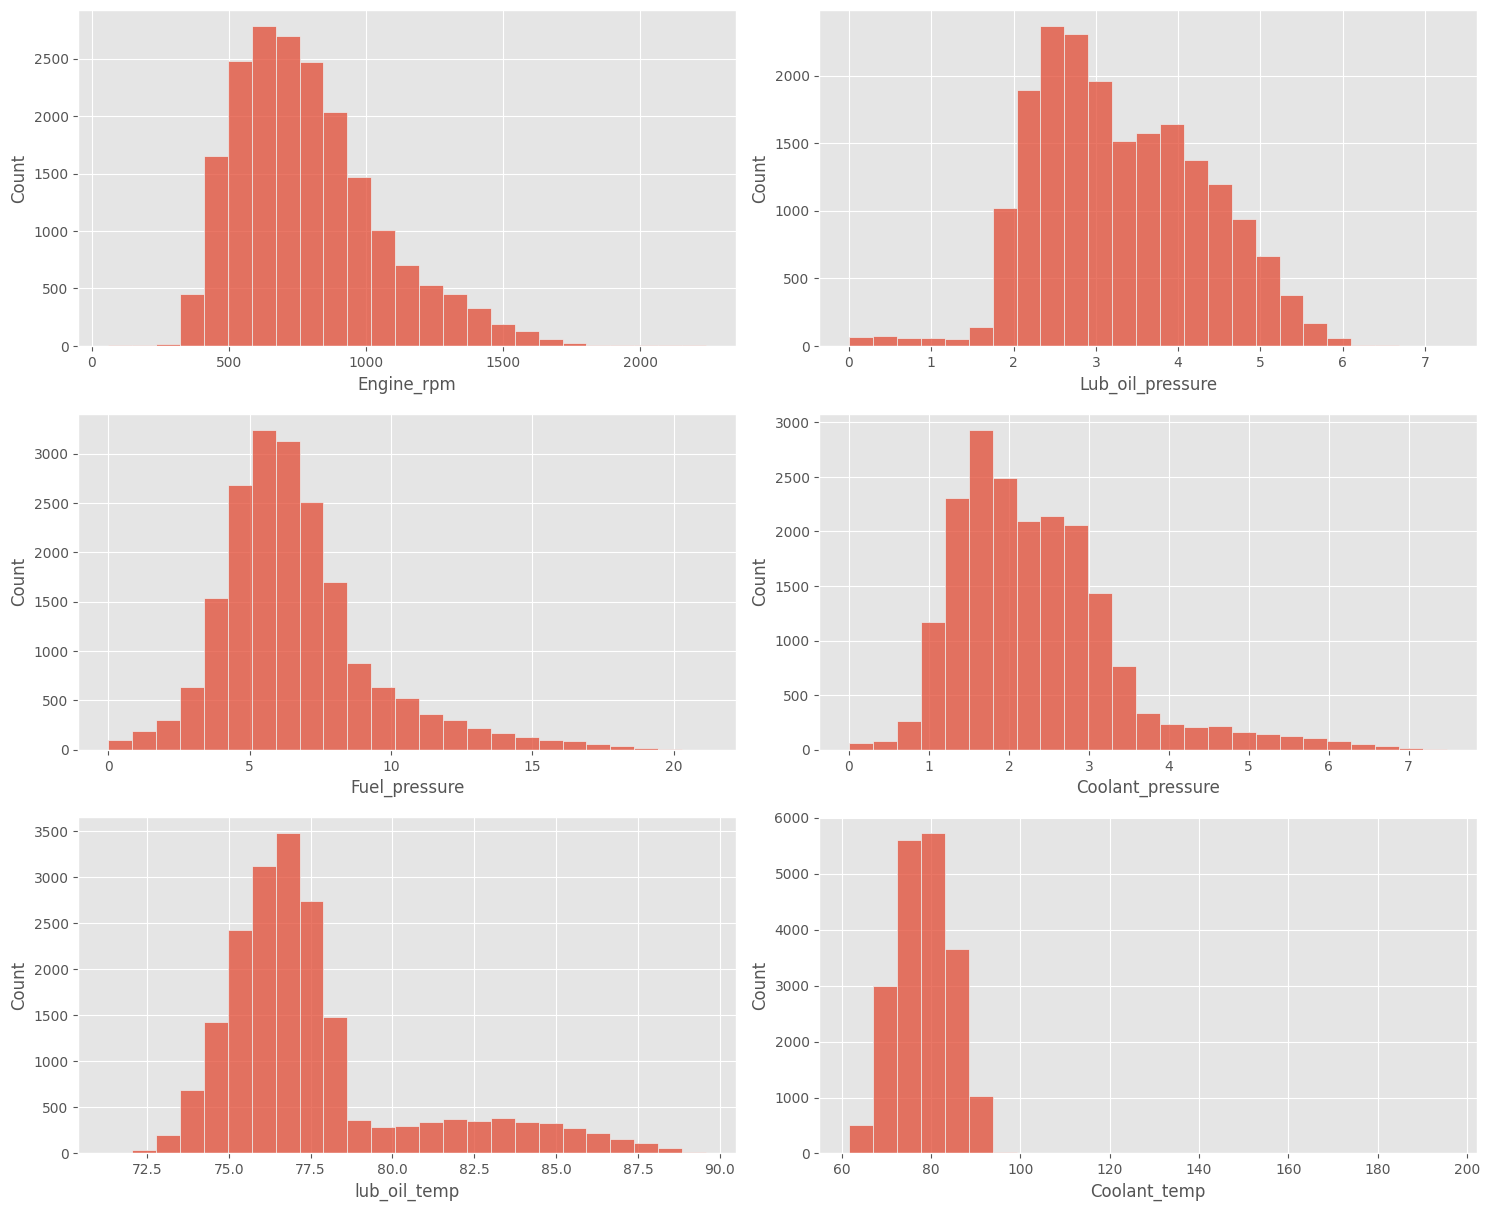

In [95]:
plt.figure(figsize=(15,40))
plot_num = 1
for col in hist_col:
    plt.subplot(10,2,plot_num)
    sns.histplot(data=df, x=col,bins=25)
    plot_num += 1
    plt.tight_layout()

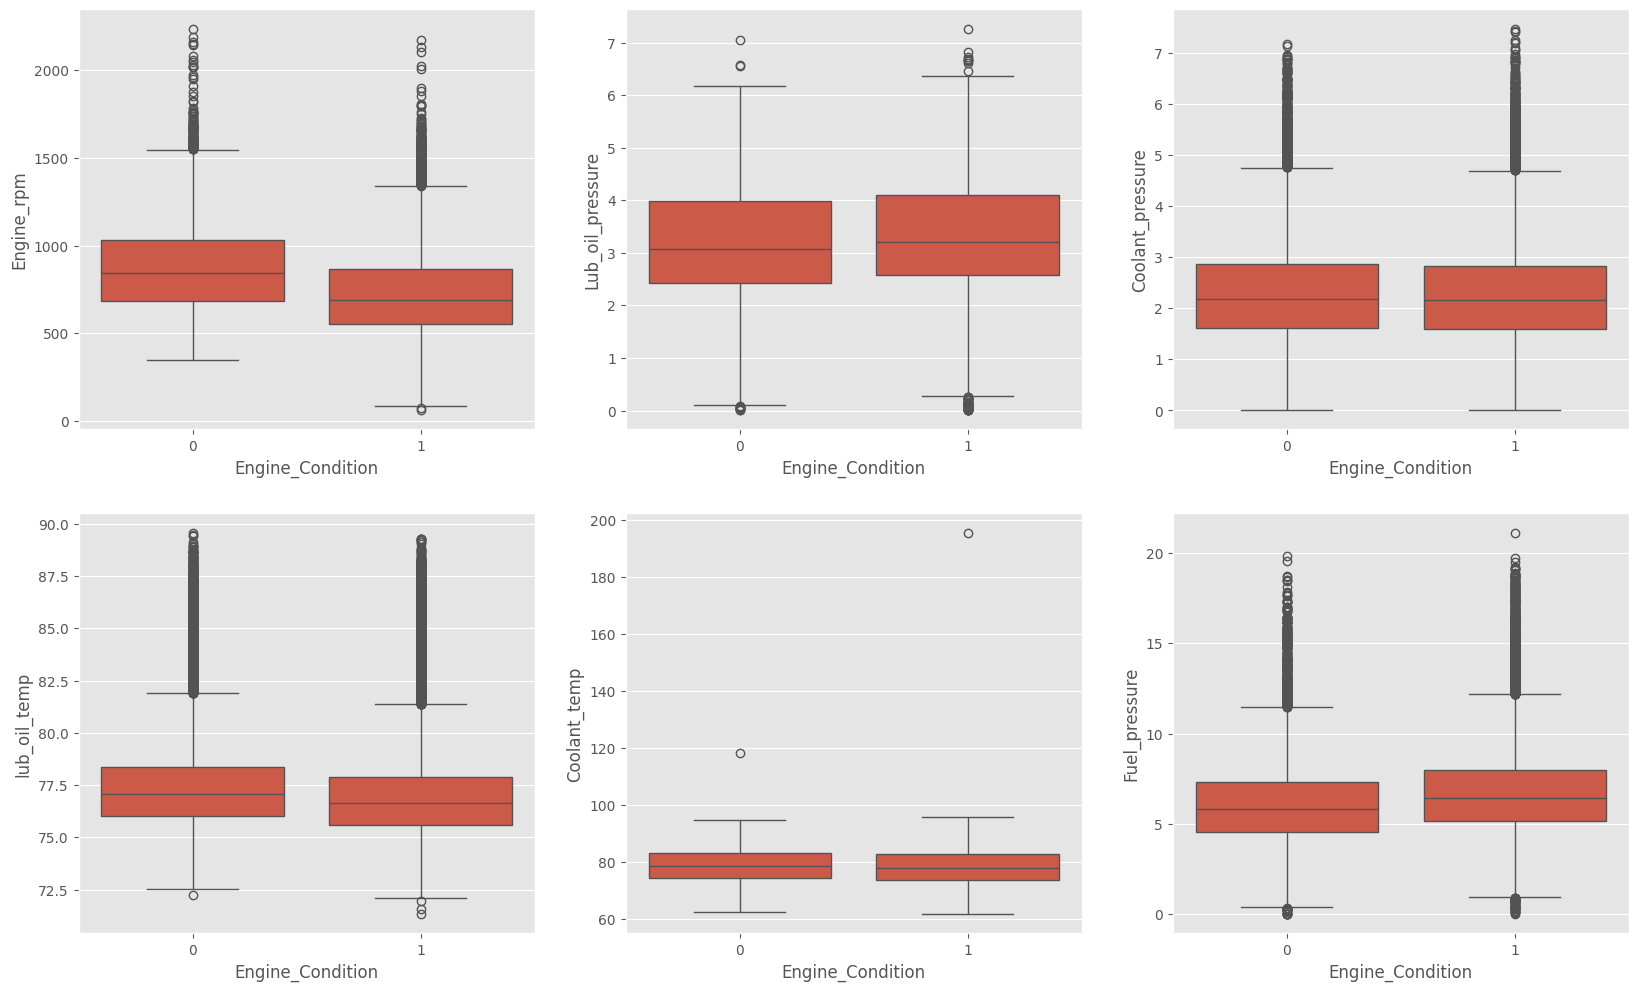

In [97]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(y = 'Engine_rpm',x ='Engine_Condition',data =df)
plt.subplot(2,3,2)
sns.boxplot(y = 'Lub_oil_pressure',x ='Engine_Condition',data =df)
plt.subplot(2,3,3)
sns.boxplot(y = 'Coolant_pressure',x ='Engine_Condition',data =df)
plt.subplot(2,3,4)
sns.boxplot(y = 'lub_oil_temp',x ='Engine_Condition',data =df)
plt.subplot(2,3,5)
sns.boxplot(y = 'Coolant_temp',x ='Engine_Condition',data =df)
plt.subplot(2,3,6)
sns.boxplot(y = 'Fuel_pressure',x ='Engine_Condition',data =df)


plt.show()

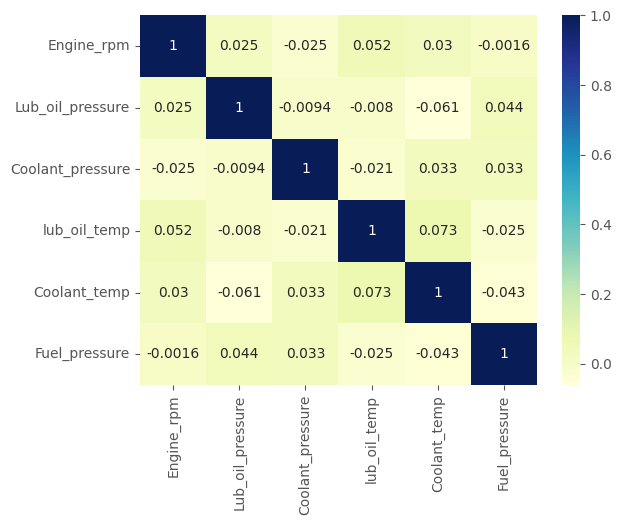

In [98]:
dataplot = sns.heatmap(df[['Engine_rpm','Lub_oil_pressure','Coolant_pressure','lub_oil_temp','Coolant_temp','Fuel_pressure']].corr(),cmap='YlGnBu',annot=True)
plt.show()

In [99]:
df['Engine_Condition'].value_counts()

Engine_Condition
1    12317
0     7218
Name: count, dtype: int64

In [128]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df['Engine_Condition'] == 1]
df_minority = df[df['Engine_Condition'] == 0]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # Sample with replacement
                                 n_samples=len(df_majority),    # To match majority class
                                 random_state=42) # Reproducible results

# Combine majority class with upsampled minority class
df_balanced = pd.concat([df_majority, df_minority_upsampled])

df_balanced['Engine_Condition'].value_counts()

Engine_Condition
1    12317
0    12317
Name: count, dtype: int64

In [130]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24634 entries, 0 to 4376
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine_rpm        24634 non-null  int64  
 1   Lub_oil_pressure  24634 non-null  float64
 2   Fuel_pressure     24634 non-null  float64
 3   Coolant_pressure  24634 non-null  float64
 4   lub_oil_temp      24634 non-null  float64
 5   Coolant_temp      24634 non-null  float64
 6   Engine_Condition  24634 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.5 MB


In [129]:
df_balanced.sample(10)

,Engine_rpm,Lub_oil_pressure,Fuel_pressure,Coolant_pressure,lub_oil_temp,Coolant_temp,Engine_Condition
8845,563,4.131017,7.809703,2.402800,77.315577,81.604736,0
11016,562,2.901017,2.308105,1.917075,77.723026,76.791217,0
18450,735,2.563581,6.825279,2.437105,73.770649,82.651008,1
1981,774,3.177804,5.638249,2.048097,74.419084,74.558721,0
5762,1089,2.374183,3.679877,3.342613,76.530812,76.667509,1
17931,1306,3.656228,6.606994,2.288506,76.735951,72.710193,1
9901,1332,5.176745,6.645048,2.709682,80.917769,77.672195,0
8763,669,3.149274,4.813867,3.485297,76.498409,72.571431,1
11314,530,1.954964,4.857561,2.436439,77.247964,83.890418,1
1158,1398,4.826571,3.942890,2.193686,75.384084,91.112120,1


In [131]:
X = df_balanced.drop('Engine_Condition',axis = 1 )
y = df_balanced['Engine_Condition']

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, shuffle=True)

X_train.shape,X_test.shape,y_train.shape, y_test.shape

((19707, 6), (4927, 6), (19707,), (4927,))

In [133]:
X_train.head(5)

,Engine_rpm,Lub_oil_pressure,Fuel_pressure,Coolant_pressure,lub_oil_temp,Coolant_temp
14811,1420,3.882929,7.670449,1.845516,75.612225,72.539180
16434,1194,3.063169,6.266013,1.654480,77.030098,76.647292
19443,910,3.880493,8.848959,1.473933,81.169078,72.769574
15895,754,0.374372,4.572402,2.243756,74.077607,78.582985
13597,799,4.164921,6.042047,2.763638,77.169075,71.390347


In [134]:
X_test.head(5)

,Engine_rpm,Lub_oil_pressure,Fuel_pressure,Coolant_pressure,lub_oil_temp,Coolant_temp
18377,581,4.354339,3.530539,1.243610,77.247776,74.329741
15219,623,2.757700,9.944112,0.164962,76.146477,83.122507
545,853,3.757125,4.465336,2.829189,86.140573,73.072728
7097,1075,3.367651,6.260724,1.717110,75.800859,81.442406
3117,860,3.747278,7.699523,1.970551,89.286302,89.098254


In [135]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19707 entries, 14811 to 16185
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine_rpm        19707 non-null  int64  
 1   Lub_oil_pressure  19707 non-null  float64
 2   Fuel_pressure     19707 non-null  float64
 3   Coolant_pressure  19707 non-null  float64
 4   lub_oil_temp      19707 non-null  float64
 5   Coolant_temp      19707 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 1.1 MB


In [136]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
ohe = OneHotEncoder(handle_unknown='ignore',drop='first')
scale = StandardScaler()

preprocesser = ColumnTransformer(
        transformers = [
            ('StandardScale', scale, [0,1,2,3,4,5])
        ],
        remainder='passthrough'
)

In [137]:
preprocesser

ColumnTransformer(remainder='passthrough',
                  transformers=[('StandardScale', StandardScaler(),
                                 [0, 1, 2, 3, 4, 5])])

In [138]:
X_train_dummy = preprocesser.fit_transform(X_train)
X_test_dummy = preprocesser.transform(X_test)

In [139]:
X_train.head(10)

,Engine_rpm,Lub_oil_pressure,Fuel_pressure,Coolant_pressure,lub_oil_temp,Coolant_temp
14811,1420,3.882929,7.670449,1.845516,75.612225,72.539180
16434,1194,3.063169,6.266013,1.654480,77.030098,76.647292
19443,910,3.880493,8.848959,1.473933,81.169078,72.769574
15895,754,0.374372,4.572402,2.243756,74.077607,78.582985
13597,799,4.164921,6.042047,2.763638,77.169075,71.390347
7413,413,2.784730,4.446986,2.417565,73.824544,90.717885
10364,877,1.964470,5.274508,4.365924,77.660832,78.525739
14697,573,2.686454,4.949163,1.963975,75.373287,77.004556
15970,717,4.847748,3.887375,2.969314,78.702417,68.696806
874,817,3.335512,8.374007,1.701025,85.391977,86.128088


In [140]:
X_test.head(10)

,Engine_rpm,Lub_oil_pressure,Fuel_pressure,Coolant_pressure,lub_oil_temp,Coolant_temp
18377,581,4.354339,3.530539,1.243610,77.247776,74.329741
15219,623,2.757700,9.944112,0.164962,76.146477,83.122507
545,853,3.757125,4.465336,2.829189,86.140573,73.072728
7097,1075,3.367651,6.260724,1.717110,75.800859,81.442406
3117,860,3.747278,7.699523,1.970551,89.286302,89.098254
18849,698,2.886641,4.184017,2.163714,76.602739,80.044671
13383,1132,2.401280,5.682015,2.296804,82.126333,76.719489
6985,737,3.757551,7.732736,2.171290,75.661936,82.870452
3401,1086,3.542769,8.753037,2.802036,77.565329,72.208979
5807,702,4.038524,7.292928,1.472610,75.715799,87.531705


In [141]:
X_train_dummy

array([[ 2.24166912,  0.58420655,  0.40562998, -0.47380458, -0.67118693,
        -0.96925143],
       [ 1.41014327, -0.21945949, -0.10889552, -0.6559695 , -0.21890942,
        -0.29882528],
       [ 0.36521697,  0.5818184 ,  0.83738556, -0.82813368,  1.10135522,
        -0.93165203],
       ...,
       [ 1.44693645,  1.63501976, -0.45093744,  1.31503969, -0.5915565 ,
         0.55392092],
       [ 2.8119634 ,  1.63372396,  0.25976074, -0.29209262, -0.1902647 ,
         1.01800666],
       [-0.52517797, -1.35801776, -1.36988188, -0.09513965, -0.75120467,
        -0.4404545 ]])

In [142]:
X_test_dummy

array([[-0.84527863,  1.04636142, -1.11105679, -1.04776194, -0.14947393,
        -0.67703957],
       [-0.69074727, -0.5189314 ,  1.23860318, -2.07632446, -0.50076972,
         0.75790177],
       [ 0.15549585,  0.46087245, -0.76858689,  0.46419347,  2.68717791,
        -0.88217871],
       ...,
       [-0.79008886, -0.82361773,  0.11850914, -0.22160004, -0.37722406,
        -1.03199608],
       [-0.62084023,  0.87344749, -0.79767795, -0.85983508,  1.36886518,
         0.66388361],
       [-0.38168457,  0.95419187, -1.29857365,  0.82470854,  0.12008427,
        -0.65269245]])

In [143]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix


# Define a list of classifiers
classifiers = [
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    LogisticRegression(),
    SVC(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    #GaussianNB(),
    XGBClassifier()  
]

# Create a dictionary to store the results
results = {}

# Train and evaluate each classifier
for clf in classifiers:
    clf_name = clf.__class__.__name__
    clf.fit(X_train_dummy, y_train)
    y_pred = clf.predict(X_test_dummy)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{clf_name} Accuracy: {accuracy}")
    
    # Classification report
    print(f"Classification Report for {clf_name}:")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    print(f"Confusion Matrix for {clf_name}:")
    print(confusion_matrix(y_test, y_pred))
    print("="*50)

RandomForestClassifier Accuracy: 0.8201745484067384
Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.79      0.87      0.83      2439
           1       0.86      0.77      0.81      2488

    accuracy                           0.82      4927
   macro avg       0.82      0.82      0.82      4927
weighted avg       0.82      0.82      0.82      4927

Confusion Matrix for RandomForestClassifier:
[[2130  309]
 [ 577 1911]]
AdaBoostClassifier Accuracy: 0.6476557743048508
Classification Report for AdaBoostClassifier:
              precision    recall  f1-score   support

           0       0.63      0.69      0.66      2439
           1       0.67      0.61      0.64      2488

    accuracy                           0.65      4927
   macro avg       0.65      0.65      0.65      4927
weighted avg       0.65      0.65      0.65      4927

Confusion Matrix for AdaBoostClassifier:
[[1677  762]
 [ 974 1514]]
GradientBo

In [144]:
# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'F1-Score', 'Precision', 'Recall'])

# Train and evaluate each classifier
for clf in classifiers:
    clf_name = clf.__class__.__name__
    clf.fit(X_train_dummy, y_train)
    y_pred = clf.predict(X_test_dummy)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_score = report['weighted avg']['f1-score']
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    
    # Append results to DataFrame
    results_df = pd.concat([results_df,pd.DataFrame([{'Model': clf_name, 'Accuracy': accuracy, 'F1-Score': f1_score, 
                                    'Precision': precision, 'Recall': recall}])], ignore_index=True)

results_df

,Model,Accuracy,F1-Score,Precision,Recall
0,RandomForestClassifier,0.813680,0.813150,0.818236,0.813680
1,AdaBoostClassifier,0.647656,0.647154,0.649059,0.647656
2,GradientBoostingClassifier,0.658616,0.657554,0.661417,0.658616
3,LogisticRegression,0.641364,0.641077,0.641514,0.641364
4,SVC,0.652933,0.652133,0.655049,0.652933
5,KNeighborsClassifier,0.649685,0.647883,0.653829,0.649685
6,DecisionTreeClassifier,0.768013,0.766568,0.776134,0.768013
7,XGBClassifier,0.727420,0.726929,0.729766,0.727420


In [145]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Instantiate the RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Train the RandomForestClassifier
rf_classifier.fit(X_train_dummy, y_train)

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test_dummy)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier Accuracy:", accuracy_rf)

# Classification report
print("Classification Report for Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Classifier Accuracy: 0.8167241729247007
Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82      2439
           1       0.86      0.76      0.81      2488

    accuracy                           0.82      4927
   macro avg       0.82      0.82      0.82      4927
weighted avg       0.82      0.82      0.82      4927

Confusion Matrix for Random Forest Classifier:
[[2126  313]
 [ 590 1898]]


In [150]:
# test 1:
print("predcted class ",rf_classifier.predict(X_test_dummy[100].reshape(1,-1))[0])
print("actual class ", y_test.iloc[100])

predcted class  1
actual class  1


In [147]:
# test 2:
print("predcted class ",rf_classifier.predict(X_test_dummy[20].reshape(1,-1))[0])
print("actual class ", y_test.iloc[20])

predcted class  0
actual class  0


In [148]:
# test 3:
print("predcted class ",rf_classifier.predict(X_test_dummy[120].reshape(1,-1))[0])
print("actual class ", y_test.iloc[120])

predcted class  0
actual class  0


In [149]:
# test 4:
print("predcted class ",rf_classifier.predict(X_test_dummy[122].reshape(1,-1))[0])
print("actual class ", y_test.iloc[122])

predcted class  0
actual class  0


In [151]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19707 entries, 14811 to 16185
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine_rpm        19707 non-null  int64  
 1   Lub_oil_pressure  19707 non-null  float64
 2   Fuel_pressure     19707 non-null  float64
 3   Coolant_pressure  19707 non-null  float64
 4   lub_oil_temp      19707 non-null  float64
 5   Coolant_temp      19707 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 1.1 MB


In [152]:
import numpy as np

def predict(Engine_rpm,Lub_oil_pressure,Fuel_pressure,Coolant_pressure,lub_oil_temp,Coolant_temp):
    
    # Prepare features array
    features = np.array([[Engine_rpm,Lub_oil_pressure,Fuel_pressure,Coolant_pressure,lub_oil_temp,Coolant_temp]], dtype=object)
    
    # Transform the features using the preprocessor
    transformed_features = preprocesser.transform(features)
    
    # predict by model
    result = rf_classifier.predict(transformed_features).reshape(1, -1)
    
    return result[0]

In [157]:
# test1
Engine_rpm = 700
Lub_oil_pressure = 2.493592
Fuel_pressure = 11.790927
Coolant_pressure = 3.178981
lub_oil_temp = 84.144163
Coolant_temp = 81.632187

result = predict(Engine_rpm,Lub_oil_pressure,Fuel_pressure,Coolant_pressure,lub_oil_temp,Coolant_temp)

if result == 1:
    print("Engine Condition is Good")
else: 
    print("Engine Condition is Bad")

Engine Condition is Good


In [ ]:
# 700	2.493592	11.790927	3.178981	84.144163	81.632187	1

In [156]:
# test 2
Engine_rpm = 563
Lub_oil_pressure = 4.131017
Fuel_pressure = 7.809703
Coolant_pressure = 2.402800
lub_oil_temp = 77.315577
Coolant_temp = 81.604736

result = predict(Engine_rpm,Lub_oil_pressure,Fuel_pressure,Coolant_pressure,lub_oil_temp,Coolant_temp)

if result == 1:
    print("Engine Condition is Good")
else: 
    print("Engine Condition is Bad")

Engine Condition is Bad


In [ ]:
# 563	4.131017	7.809703	2.402800	77.315577	81.604736	0

In [158]:
import pickle
pickle.dump(rf_classifier,open('rf_classifier.pkl','wb'))
pickle.dump(preprocesser,open('preprocessor.pkl','wb'))